# Story 
[Dataset](https://www.kaggle.com/datasets/ksabishek/product-sales-data) description: Data is from a small-scaled business venture. They have been selling FOUR PRODUCTS for OVER TEN YEARS.
<details>
<summary>They have collected data from their retail centers and organized it into a small csv file:</summary>
The excel file contains about 8 numerical parameters:
  
ID

Date

Q1- Total unit sales of product 1

Q2- Total unit sales of product 2

Q3- Total unit sales of product 3

Q4- Total unit sales of product 4

S1- Total revenue from product 1

S2- Total revenue from product 2

S3- Total revenue from product 3

S4- Total revenue from product 4
</details>

The CEO wants answers to the following questions:
- Is there any trend in the sales of all four products during certain months?
- Out of all four products, which product has seen the highest sales in all the given years?
- The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.

# Step 1. Import libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Step 2. Load datasets

In [2]:
data = pd.read_csv('/Users/olgadaronda/Documents/projects/Data Analysis/sales_analysis.csv')
data

,id,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4600 non-null   int64  
 1   Date    4600 non-null   object 
 2   Q-P1    4600 non-null   int64  
 3   Q-P2    4600 non-null   int64  
 4   Q-P3    4600 non-null   int64  
 5   Q-P4    4600 non-null   int64  
 6   S-P1    4600 non-null   float64
 7   S-P2    4600 non-null   float64
 8   S-P3    4600 non-null   float64
 9   S-P4    4600 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 359.5+ KB


In [4]:
data.columns

Index(['id', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3',
       'S-P4'],
      dtype='object')

# Step 2. Observations:
1. For each date there are P1, P2, P3, P4 sales numbers and revenue for each product as well.
2. Dataset starts from 13-06-2010 - so data for 2010 is not full.
3. Dataset ends at 03.02.2023 - so data for 2023 is not full.

# Step 3. Check for emptly values

In [5]:
data.isnull().sum()

id      0
Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64

# Step 3 Observations:
There are no missing values in the dataset.

# Step 4. Exploratory Data Analysis (EDA)

# Step 4.1 Learning EDA and different visualizations on a small data set

In [6]:
# create new small test dataset
data_test = pd.DataFrame(data=data.iloc[:5])
data_test


,id,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [7]:
# try splitting date column
data_test[['Day', 'Month', 'Year']] = data_test['Date'].str.split('-', n=3, expand=True)
# display the dataframe
data_test

,id,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010


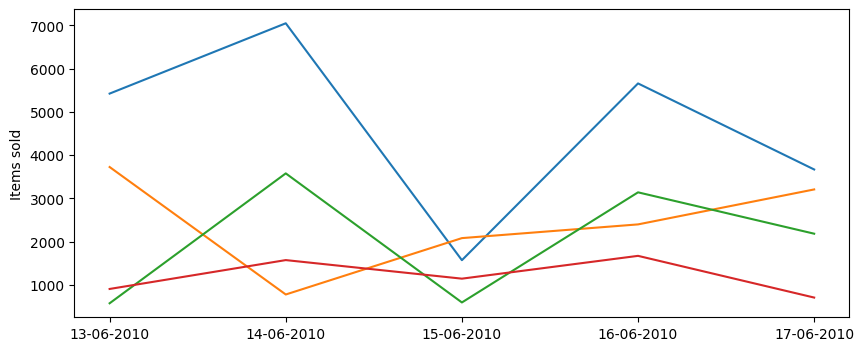

In [8]:
# try making a chart for learning purposes
plt.figure(figsize=[10,4])
plt.plot('Date', 'Q-P1', data=data_test)
plt.plot('Date', 'Q-P2', data=data_test)
plt.plot('Date', 'Q-P3', data=data_test)
plt.plot('Date', 'Q-P4', data=data_test)
plt.ylabel('Items sold')
plt.show()


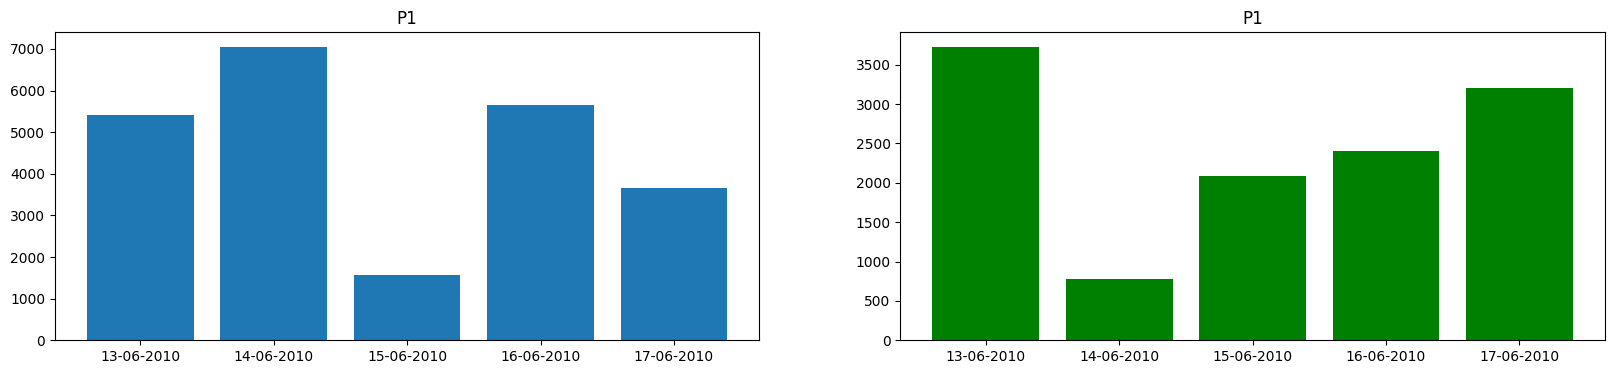

In [9]:
# different viz types and subplots
plt.figure(figsize=[20,4])
plt.subplot(121)
plt.bar('Date', 'Q-P1', data=data_test)
plt.title('P1')
plt.subplot(122)
plt.bar('Date', 'Q-P2', data=data_test, color = 'green')
plt.title('P1')
plt.show()

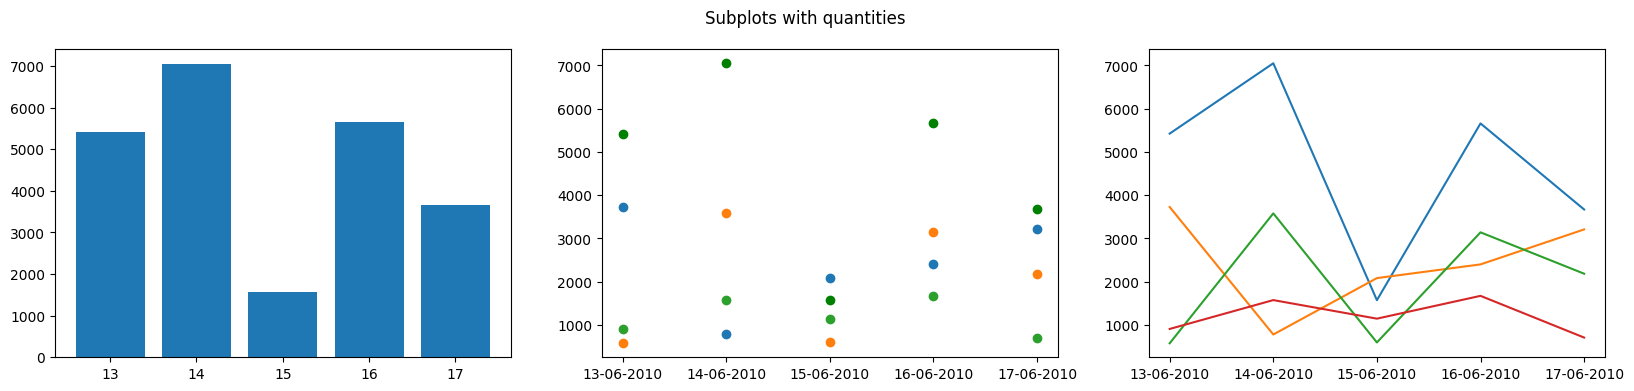

In [10]:
# different viz types and subplots
plt.figure(figsize=[20,4])
plt.subplot(131)
plt.bar('Day', 'Q-P1', data=data_test)
plt.subplot(132)
plt.scatter('Date', 'Q-P1', data=data_test, color = 'green')
plt.scatter('Date', 'Q-P2', data=data_test)
plt.scatter('Date', 'Q-P3', data=data_test)
plt.scatter('Date', 'Q-P4', data=data_test)
plt.subplot(133)
plt.plot('Date', 'Q-P1', data=data_test)
plt.plot('Date', 'Q-P2', data=data_test)
plt.plot('Date', 'Q-P3', data=data_test)
plt.plot('Date', 'Q-P4', data=data_test)
plt.suptitle('Subplots with quantities')
plt.show()

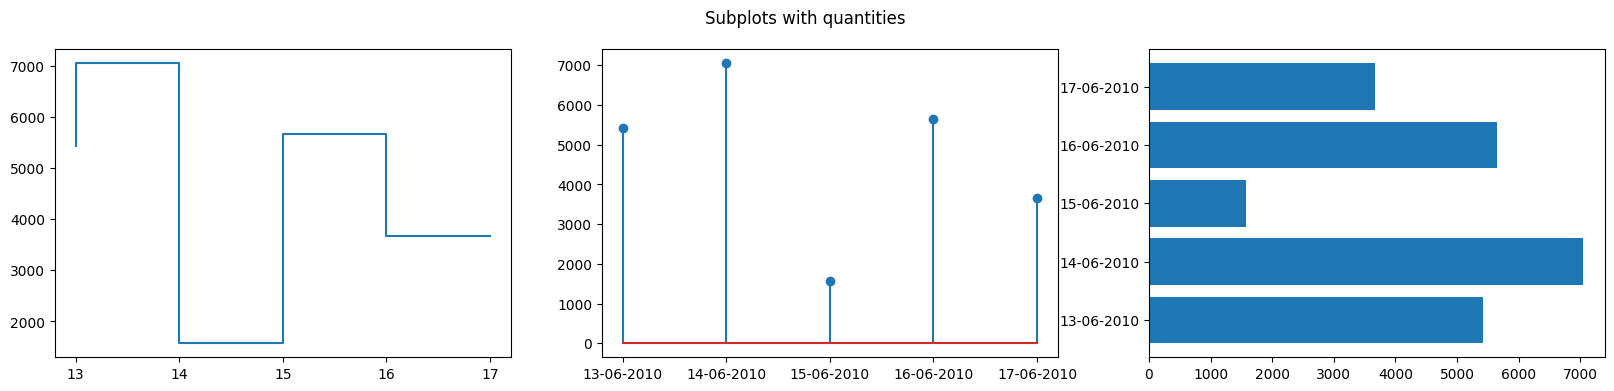

In [11]:
# different viz types and subplots
plt.figure(figsize=[20,4])
plt.subplot(131)
plt.step('Day', 'Q-P1', data=data_test)
plt.subplot(132)
plt.stem('Date', 'Q-P1', data=data_test)
plt.subplot(133)
plt.barh('Date', 'Q-P1', data=data_test)
plt.suptitle('Subplots with quantities')
plt.show()

In [12]:
# Explore melting some data
data_dropped = pd.DataFrame.drop(data_test, columns='id')
melted = pd.melt(data_dropped, id_vars=['Date', 'Day', 'Month', 'Year'], var_name='Product', value_name='Sales')
melted

,Date,Day,Month,Year,Product,Sales
0,13-06-2010,13,06,2010,Q-P1,5422.00
1,14-06-2010,14,06,2010,Q-P1,7047.00
2,15-06-2010,15,06,2010,Q-P1,1572.00
3,16-06-2010,16,06,2010,Q-P1,5657.00
4,17-06-2010,17,06,2010,Q-P1,3668.00
5,13-06-2010,13,06,2010,Q-P2,3725.00
6,14-06-2010,14,06,2010,Q-P2,779.00
7,15-06-2010,15,06,2010,Q-P2,2082.00
8,16-06-2010,16,06,2010,Q-P2,2399.00
9,17-06-2010,17,06,2010,Q-P2,3207.00


In [13]:
# Get table with only quantity data
q = data_test.drop(columns=['id','S-P1','S-P2','S-P3','S-P4'])
q

,Date,Q-P1,Q-P2,Q-P3,Q-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,13,06,2010
1,14-06-2010,7047,779,3578,1574,14,06,2010
2,15-06-2010,1572,2082,595,1145,15,06,2010
3,16-06-2010,5657,2399,3140,1672,16,06,2010
4,17-06-2010,3668,3207,2184,708,17,06,2010


In [14]:
# Get table with only sales data
s = data_test.drop(columns=['id','Q-P1','Q-P2','Q-P3','Q-P4'])
s

,Date,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,11627.56,20332.38,11837.28,5048.04,17,06,2010


In [15]:
# Melt quntity data
q_melted = pd.melt(q, id_vars=['Date', 'Day', 'Month', 'Year'], var_name='Product', value_name='Sales')
q_melted.head(5)

,Date,Day,Month,Year,Product,Sales
0,13-06-2010,13,06,2010,Q-P1,5422
1,14-06-2010,14,06,2010,Q-P1,7047
2,15-06-2010,15,06,2010,Q-P1,1572
3,16-06-2010,16,06,2010,Q-P1,5657
4,17-06-2010,17,06,2010,Q-P1,3668


In [16]:
# Melt sales data
s_melted = pd.melt(s, id_vars=['Date', 'Day', 'Month', 'Year'], var_name='Product', value_name='Sales')
s_melted.head(5)

,Date,Day,Month,Year,Product,Sales
0,13-06-2010,13,06,2010,S-P1,17187.74
1,14-06-2010,14,06,2010,S-P1,22338.99
2,15-06-2010,15,06,2010,S-P1,4983.24
3,16-06-2010,16,06,2010,S-P1,17932.69
4,17-06-2010,17,06,2010,S-P1,11627.56


In [17]:
# Finding total numbers
total_qty = q_melted.groupby('Product').sum()
total_qty

,Sales
Product,
Q-P1,23366
Q-P2,12192
Q-P3,10073
Q-P4,6006


In [18]:
# Finding total numbers
total_sls = s_melted.groupby('Product').sum()
total_sls

,Sales
Product,
S-P1,74070.22
S-P2,77297.28
S-P3,54595.66
S-P4,42822.78


Text(0.5, 1.0, 'Total Revenue')

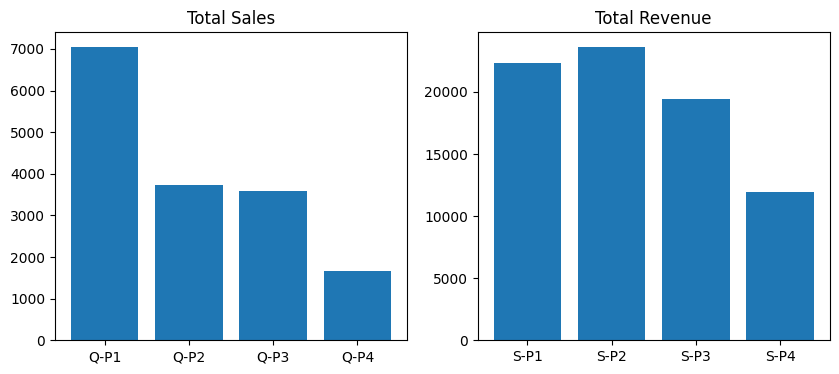

In [19]:
# Compare sales qty and revenue for each product
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar('Product', 'Sales', data=q_melted)
plt.title('Total Sales')
plt.subplot(122)
plt.bar('Product', 'Sales', data=s_melted)
plt.title('Total Revenue')

# Step 4.1 EDA Yearly on the initial data set

In [20]:
# Extract Day, Month, Year from Date colmn
data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', n=3, expand=True)
# display the dataframe
data

,id,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [21]:
# Drop years with not full data - 2010 and 2023
data_reduced = data.query("Year != '2010' and Year != '2023'")
data_reduced = data_reduced.drop(columns='id')
data_reduced

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022
4564,29-12-2022,6457,1851,3369,669,20468.69,11735.34,18259.98,4769.97,29,12,2022


In [22]:
# Group by year
q_by_year = data_reduced.groupby('Year').sum().reset_index()
q_by_year

,Year,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,2011,1435633,751692,1160897,412322,4550956.61,4765727.28,6292061.74,2939855.86
1,2012,1508611,769797,1144590,417920,4782296.87,4880512.98,6203677.80,2979769.60
2,2013,1533099,754526,1116114,405394,4859923.83,4783694.84,6049337.88,2890459.22
3,2014,1572144,789069,1162719,403748,4983696.48,5002697.46,6301936.98,2878723.24
4,2015,1484197,767964,1112136,413251,4704904.49,4868891.76,6027777.12,2946479.63
5,2016,1517603,783892,1112698,408415,4810801.51,4969875.28,6030823.16,2911998.95
6,2017,1469715,808843,1166668,419020,4658996.55,5128064.62,6323340.56,2987612.60
7,2018,1531419,751252,1152070,398550,4854598.23,4762937.68,6244219.40,2841661.50
8,2019,1482623,785373,1135262,410425,4699914.91,4979264.82,6153120.04,2926330.25
9,2020,1498357,778322,1175277,419854,4749791.69,4934561.48,6370001.34,2993559.02


In [23]:
# Get table with only quantity data
quantity = q_by_year.drop(columns=['S-P1','S-P2','S-P3','S-P4'])
quantity

,Year,Q-P1,Q-P2,Q-P3,Q-P4
0,2011,1435633,751692,1160897,412322
1,2012,1508611,769797,1144590,417920
2,2013,1533099,754526,1116114,405394
3,2014,1572144,789069,1162719,403748
4,2015,1484197,767964,1112136,413251
5,2016,1517603,783892,1112698,408415
6,2017,1469715,808843,1166668,419020
7,2018,1531419,751252,1152070,398550
8,2019,1482623,785373,1135262,410425
9,2020,1498357,778322,1175277,419854


In [24]:
# Get table with only sales data
sales = q_by_year.drop(columns=['Q-P1','Q-P2','Q-P3','Q-P4'])
sales

,Year,S-P1,S-P2,S-P3,S-P4
0,2011,4550956.61,4765727.28,6292061.74,2939855.86
1,2012,4782296.87,4880512.98,6203677.80,2979769.60
2,2013,4859923.83,4783694.84,6049337.88,2890459.22
3,2014,4983696.48,5002697.46,6301936.98,2878723.24
4,2015,4704904.49,4868891.76,6027777.12,2946479.63
5,2016,4810801.51,4969875.28,6030823.16,2911998.95
6,2017,4658996.55,5128064.62,6323340.56,2987612.60
7,2018,4854598.23,4762937.68,6244219.40,2841661.50
8,2019,4699914.91,4979264.82,6153120.04,2926330.25
9,2020,4749791.69,4934561.48,6370001.34,2993559.02


In [25]:
# Melt the grouped data for plotting by Year
qy_melted = pd.melt(quantity, id_vars='Year', var_name='Product', value_name='Sales')
qy_melted.head(5)

,Year,Product,Sales
0,2011,Q-P1,1435633
1,2012,Q-P1,1508611
2,2013,Q-P1,1533099
3,2014,Q-P1,1572144
4,2015,Q-P1,1484197


In [26]:
# Melt the grouped data for plotting by Year
sy_melted = pd.melt(sales, id_vars='Year', var_name='Product', value_name='Sales')
sy_melted.head(5)

,Year,Product,Sales
0,2011,S-P1,4550956.61
1,2012,S-P1,4782296.87
2,2013,S-P1,4859923.83
3,2014,S-P1,4983696.48
4,2015,S-P1,4704904.49


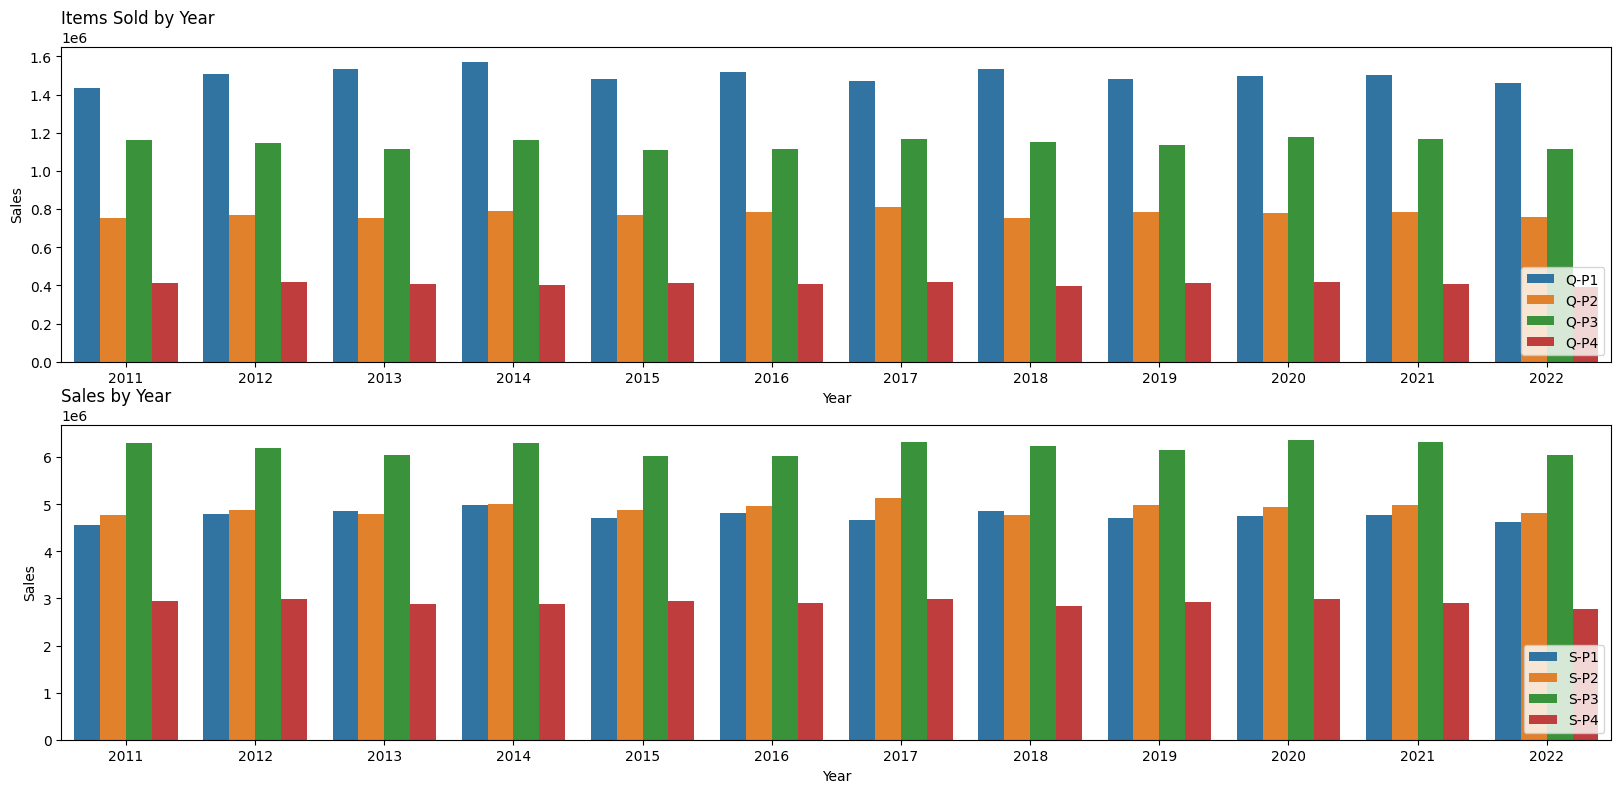

In [27]:
    # Create a bar chart for Items Sold by Year VS Sales By Year
plt.figure(figsize=(20,9))
plt.subplot(211)
sns.barplot(data=qy_melted, x='Year', y='Sales', hue='Product', ) 
plt.legend(loc=4)
plt.title('Items Sold by Year', loc='left')
#plt.xticks(rotation=45)
plt.subplot(212)
sns.barplot(data=sy_melted, x='Year', y='Sales', hue='Product') 
plt.legend(loc=4)
plt.title('Sales by Year', loc='left')
plt.show()

# Step 4.1 Observations:

1. P1 has the highest value in items sold each year, with the highest number in year 2014.
2. P4 has the lowest value in items sold each year, with the (slightly) lowest in 2022, and brings the lowest revenue.
    - P4 might be a good candidate for dropping from the production.
3. Each item has relatively equal number of sales each year, deviation is relatively low.
4. P3 brings the most revemue, despite being 2nd in item sales.
5. P1 brinds 2nd highest revenue, being 1st highest in item sales.
6. P1 and P2 revenues are almost equal each year, despite P1 items are sold by almost 2x more times.

# Step 4.2 EDA Monthly on the initial dataset

Find out trends in mean unit sales by month troughout years 2011-2022.

In [91]:
# Group by month to find mean item sales
qmean_by_month = data_reduced.groupby('Month').mean().reset_index()
qmean_by_month

,Month,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,01,4095.763441,2219.594086,3102.639785,1116.088710,12983.570108,14072.226505,16816.307634,7957.712500
1,02,4219.291291,2100.579580,3175.903904,1103.363363,13375.153393,13317.674535,17213.399159,7866.980781
2,03,4049.930108,2185.384409,3030.922043,1124.397849,12838.278441,13855.337151,16427.597473,8016.956667
3,04,4208.180556,2114.822222,3214.711111,1140.572222,13339.932361,13407.972889,17423.734222,8132.279944
4,05,4043.021505,2129.284946,3359.341398,1100.021505,12816.378172,13499.666559,18207.630376,7843.153333
5,06,4235.002778,2106.483333,3110.408333,1113.352778,13424.958806,13355.104333,16858.413167,7938.205306
6,07,4217.973118,2057.247312,3043.994624,1139.653226,13370.974785,13042.947957,16498.450860,8125.727500
7,08,4137.166667,2245.463889,3116.594444,1126.033333,13114.818333,14236.241056,16891.941889,8028.617667
8,09,3881.583333,2074.392473,3291.255376,1154.435484,12304.619167,13151.648280,17838.604140,8231.125000
9,10,4188.233333,2087.319444,3107.475000,1119.686111,13276.699667,13233.605278,16842.514500,7983.361972


In [ ]:
# Month '9' should be Month '09' - replace values
data_reduced['Month'] = data['Month'].replace('9', '09')
qmean_by_month

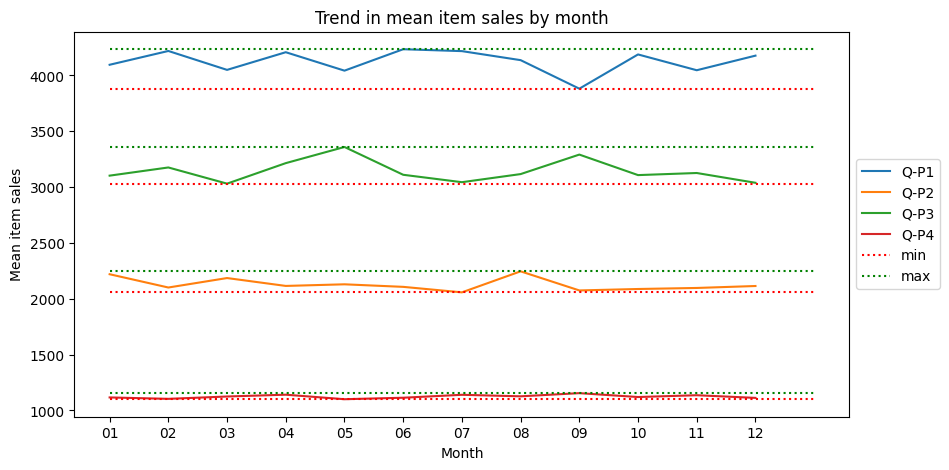

In [93]:
    # Create a bar chart for mean item sales by month
plt.figure(figsize=(10,5))
plt.plot('Month', 'Q-P1', data=qmean_by_month)
plt.plot('Month', 'Q-P2', data=qmean_by_month)
plt.plot('Month', 'Q-P3', data=qmean_by_month)
plt.plot('Month', 'Q-P4', data=qmean_by_month)
plt.hlines(y=qmean_by_month['Q-P1'].min(), xmin=0, xmax=len(qmean_by_month), color='r', linestyles='dotted', label='min')
plt.hlines(y=qmean_by_month['Q-P2'].min(), xmin=0, xmax=len(qmean_by_month), color='r', linestyles='dotted')
plt.hlines(y=qmean_by_month['Q-P3'].min(), xmin=0, xmax=len(qmean_by_month), color='r', linestyles='dotted')
plt.hlines(y=qmean_by_month['Q-P4'].min(), xmin=0, xmax=len(qmean_by_month), color='r', linestyles='dotted')
plt.hlines(y=qmean_by_month['Q-P1'].max(), xmin=0, xmax=len(qmean_by_month), color='g', linestyles='dotted', label='max')
plt.hlines(y=qmean_by_month['Q-P2'].max(), xmin=0, xmax=len(qmean_by_month), color='g', linestyles='dotted')
plt.hlines(y=qmean_by_month['Q-P3'].max(), xmin=0, xmax=len(qmean_by_month), color='g', linestyles='dotted')
plt.hlines(y=qmean_by_month['Q-P4'].max(), xmin=0, xmax=len(qmean_by_month), color='g', linestyles='dotted')
plt.xlabel('Month')
plt.ylabel('Mean item sales')
plt.title('Trend in mean item sales by month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Step 4.2 Observations:

1. For product 1, mean item sales are the highest in February, April, June-July, October, December; and they dramatically drop in September.
2. For product 2, mean item sales are the highest in May and September; with the lowest in March, July, December.
3. For product 3, mean item sales are the highest in January, March, and August; during other months sales for this product are relatively low.
4. For product 4, mean item sales are quite uniform January through December.

# Conclusions

*1. Yearly sales and revenues*

- The highest revenue each year from 2011 to 2022 was brought by Product 3, the number of items sold for it are 2nd highest.
- The most items are sold yearly for Product 1, bringing 2nd highest revenue each year.
- Product 1 and Product 2 revenues are almost equal each year, despite P1 items are sold by almost 2x more times.

- Product 4 has the lowest value in items sold each year, and brings the lowest revenue out of all four products.
    - This makes Product 4 a good candidate for dropping from the production, which will not dramatically impact company's sales revenues.


*2. Monthly sales trends*

- For Product 1, mean item sales are the highest in February, April, June-July, October, December; sales dramatically drop in September.
- For Product 2, mean item sales are the highest in May and September; with the lowest in March, July, December.
- For Product 3, mean item sales are the highest in January, March, and August; during other months sales for this product are significantly lower.
- For Product 4, mean item sales are quite uniform January through December.
- No uniform pattern for all four product sales was found.